In [0]:
from keras.models import load_model
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 130942 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.6-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.6-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.6-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
!mkdir drive
!google-drive-ocamlfuse drive

In [6]:
model=load_model('drive/Colab Notebooks/model_1.h5')

W0702 05:12:12.127585 140578667362176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 05:12:12.184764 140578667362176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0702 05:12:12.240294 140578667362176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 05:12:12.241379 140578667362176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0702 05:12:12.243100 140578667

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 21, 21, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
__________

In [0]:
data=pd.read_csv(r'drive/Colab Notebooks/challenges-in-representation-learning-facial-expression-recognition-challenge/fer2013/fer2013.csv')

Since we didn't save our data in CSV form, we will have to access it again in the DataFrame.

In [0]:
x=([w.split() for w in data['pixels']])

In [0]:
dataset=np.array(x,dtype='int')

In [0]:
final_data=dataset.reshape(-1, 48, 48, 1)
final_data=final_data/255.0

In [0]:
y=np.array(data['emotion'], dtype='float')
X=final_data

In [0]:
from sklearn.model_selection import train_test_split
X_train,  X_test, y_train, y_test=train_test_split(X,y, test_size=0.1)

In [0]:
from keras.utils.np_utils import to_categorical
y_train=to_categorical(y_train, num_classes=7)
y_test=to_categorical(y_test, num_classes=7)

In [0]:
predictions=model.predict(X_test)

In [0]:
matrix=confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))

In [0]:
matrix=matrix*100/y_test.shape[0]
emotions=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

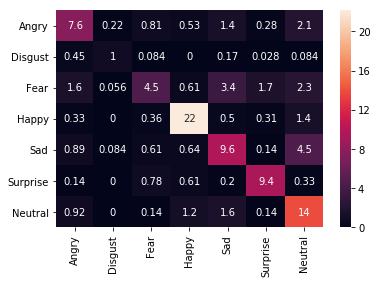

In [34]:
import seaborn as sns
sns.heatmap(matrix, annot=True, xticklabels=emotions, yticklabels=emotions)   

##Key Findings:

->Disgust has very few samples in the dataset. 
There is also some misclassification between Disgust and Anger which show similar features like raised eyebrows.

->Anger in some cases is classified as Neutral

->Fear is classified mostly between Fear, Sad, and Neutral

->Sad is also sometimes classified as Neutral

